# UK Parliament Petition 248281

<https://petition.parliament.uk/petitions/248281>

In [1]:
import json
import os

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shijian
shijian.setup_Jupyter()

In [2]:
files = []
for r, d, f in os.walk('.'):
    for _file in f:
        if '.json' in _file:
            files.append(os.path.join(r, _file))

In [3]:
data = []
for _file in files:
    _datetime = os.path.splitext(os.path.basename(_file))[0]
    with open(_file) as f:
        count = json.load(f)['data']['attributes']['signature_count']
    data.append([_datetime, count])

df = pd.DataFrame(
    data,
    columns = [
        "datetime",
        "signatures"
    ]
)
df.index = pd.to_datetime(df["datetime"])
del df["datetime"]
df = df.sort_index()
df.tail()

,signatures
datetime,
2019-04-11 18:09:47+00:00,244797
2019-04-11 18:39:47+00:00,244833
2019-04-11 19:09:48+00:00,244860
2019-04-11 19:39:49+00:00,244896
2019-04-11 20:09:50+00:00,244918


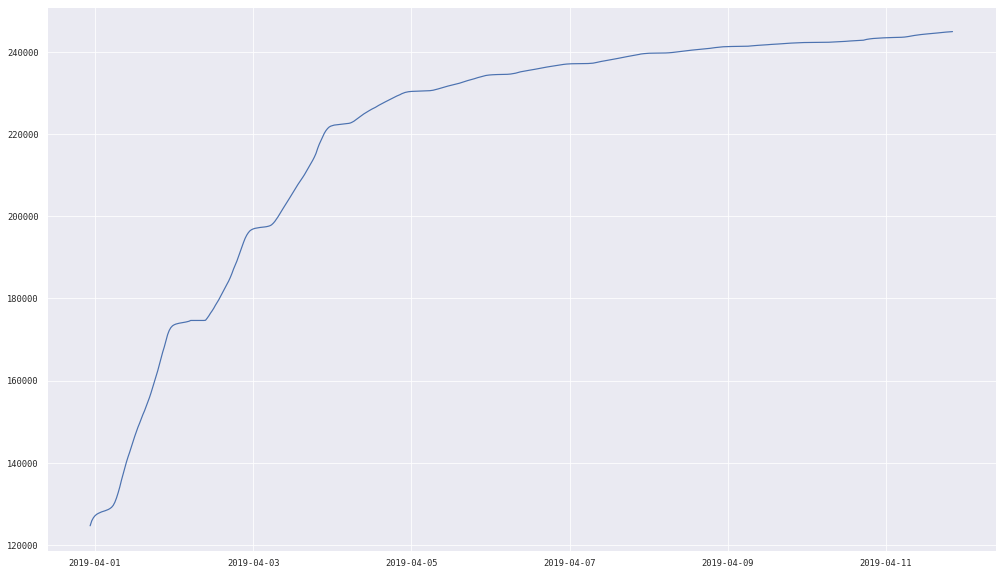

In [4]:
plt.plot(df.index, df["signatures"])
plt.show();

In [5]:
delta_hours         = (df.index[-1] - df.index[0]).total_seconds() / 3600 + 1
delta_signatures    = df["signatures"][-1] - df["signatures"][0]
signatures_per_hour = delta_signatures / delta_hours
signatures_per_hour

457.7535491486486

In [6]:
signatures_per_second = signatures_per_hour / (60 * 60)
signatures_per_second

0.12715376365240239

In [7]:
signatures_per_day = signatures_per_hour * 24
signatures_per_day

10986.085179567566